<div style="text-align: center;">
<h1>The University of North Carolina at Chapel Hill</h1>
<h1>Comp 555 BioAlgorithms - Spring 2018</h1>
<h1 style="font-size: 250%;">Problem Set #1 </h1>
<h1>Issued Tuesday, 1/30/2017; Due Thursday, 2/15/2017</h1>
</div>

**Homework Information:** Some of the problems are probably too long to be done the night before the due date, so plan accordingly. Late problem sets will be penalized by a factor of	70.71% for each class meeting after the due date. Feel free to get help from others, but the work you submit in should be your own. It is very important that you enter your answers in the provided cells. You can add extra cells to explore approaches, but only the provided cell can and will be graded.

In [10]:
text = ["abananas","amabananas","anamabananas","ananas","anas","as","bananas","mabananas","namabananas","nanas","nas","panamabananas","s"]
counts = {}
for i in range(len(text)):
    substring = text[i][0:2]
    counts[substring] = counts.get(substring,0)+1
print counts

{'ab': 1, 'ma': 1, 'ba': 1, 'na': 3, 'am': 1, 's': 1, 'an': 3, 'as': 1, 'pa': 1}


In [ ]:
banana$
anana$b
nana$ba
ana$ban
na$bana
a$banan
$banana

$banana
a$banan
ana$ban
anana$b
banana$
na$bana
nana$ba

---
**Problem #1:** 

A. Find the length of the shortest *missing* *k*-mer in the genome of [Salmonella Typhimurium](http://csbio.unc.edu/mcmillan/Comp555S18/data/SalmonellaTyphimurium.fa) (ignore the second plasmid sequence). Report all missing *k*-mers of that length. 

B. Given that Salmonella's genome is 4857432 base-pairs in length, how does your answer in (a) compare to the *expected* length of the shortest missing *k*-mer? What are the assumptions of you answer, if any? 


In [7]:
from itertools import product

"""parse FASTA files"""
def loadFasta(filename):
    if (filename.endswith(".gz")):
        fp = gzip.open(filename, 'rb')
    else:
        fp = open(filename, 'rb')
 # split at headers
    data = fp.read().split('>')
    fp.close()
 # ignore whatever appears before the 1st header
    data.pop(0)
    headers = []
    sequences = []
    for sequence in data:
        lines = sequence.split('\n')
        headers.append(lines.pop(0))
 # add an extra "+" to make string "1-referenced"
        sequences.append('+' + ''.join(lines))
    return (headers, sequences)

"""counting k-mers"""
def kmerFreq(k, sequence):
    kmerCount = {}
    for i in xrange(len(sequence)-k+1):
        kmer = sequence[i:i+k]
        kmerCount[kmer] = kmerCount.get(kmer,0)+1
    return kmerCount

header, seq = loadFasta("SalmonellaTyphimurium.fa")

seq = seq[0]
header = header[0]
seq = seq[1:len(seq)]

condition = True
kmer1 = {}
kmerList = []
shortestMissing = 1
kmerLength = len(kmerFreq(shortestMissing, seq))

while (condition == True):
    if (pow(4, shortestMissing) == kmerLength):
        shortestMissing = shortestMissing + 1
        kmerLength = len(kmerFreq(shortestMissing, seq))
    else:
        print str(shortestMissing)
        kmer1 = kmerFreq(shortestMissing, seq)
        for key, value in kmer1.iteritems():
            kmerList.append(key)
        allKmers = list(product(["A", "G", "C", "T"], repeat = shortestMissing))
        
        for i in range(0, len(allKmers)):
            tup=allKmers[i]
            allKmers[i]="".join(tup)
        
        missingKmers = list(set(allKmers)-set(kmerList))
        
        print str(len(missingKmers))
        print missingKmers
        
        condition = False

8
217
['GGCCTAGA', 'CTAGACTC', 'CTAGAGCC', 'CCTAAGTG', 'GGCTCTAG', 'AGCCCTAG', 'ACCTAGTT', 'CCTAGTGC', 'CCCCTAGT', 'TCTAGGGG', 'TTACTAGG', 'GGCCCTAG', 'ACCTAGTC', 'CTAGGGAA', 'ATCCTAGG', 'CTAGGGAC', 'CCTAGGTA', 'CCTAGGTC', 'CTAGTTCG', 'CTAGTAGA', 'AGAGCTAG', 'TAGGGCCC', 'CTCCTAGG', 'CTAGGTAG', 'TCTAGTCT', 'GACCTAGC', 'CTAGATGC', 'GACCTAGG', 'CTAGATGA', 'AGCCTAGA', 'GTCCTAGA', 'CCCTAGGA', 'TGTCCTAG', 'GTCTAGGG', 'CCTAGAGA', 'GTCTAGGA', 'CCGTCTAG', 'AGCCTAGG', 'CTACCTAG', 'CCCTAGGT', 'GCCTAGTA', 'GGTTCTAG', 'CTAGATAC', 'ACTAGATA', 'GTCTAGTA', 'CTAGAGTT', 'TCTAGAGT', 'GCTCTAGA', 'CTAGGTCT', 'ATGCTAGA', 'TCCTAGAC', 'GCTCTAGG', 'CCATCTAG', 'CTAGGCTT', 'ACACCTAG', 'GCCTAGGC', 'CTAGGTCG', 'GCCTAGGA', 'GCCTAGGG', 'CTAGGTCC', 'CGACCTAG', 'CCTAGGCA', 'ACTACTAG', 'CTAGTCCA', 'GGGTCTAG', 'CCTAGGCG', 'TGCCCTAG', 'TTTCTAGA', 'CCTAGCTA', 'CTAGGGCC', 'TACCTAGA', 'TACCTAGG', 'CTAGGGCG', 'TCTAGGAA', 'GCACCTAG', 'TCCTAGCC', 'CTAGAGAC', 'TGCCTAGG', 'AGCCTAGT', 'TAGATCTA', 'CGATCTAG', 'GTCTAGCA', 'GTCTAGCC

---
**Problem #2:** Modify the <code>kmerPositions()</code> function given in Lecture 2 on slide 20 to allow for one error. Your new function:

     kmersWithError(k, sequence)

should return a Python dictionary whose keys are kmers that appear in either the sequence or its reverse complement, and whose values are a list of positions of a kmer that differs in no more than one base from the key or its reverse complement. Your list should include only the lexigraphically first of each kmer/reverse complement pair. Enter the code for your function in the space provided below.

You can test your code on the following sequence:
<pre>
test = "ggtaattgcctcgcataacgcggtgtgaaaatggattgaagcccgggcggtggattctac"+\
       "tcaactttagccgatggagaaagccccgggatccgggctattaaaaagaagatcttttta"+\
       "tttagagatctgttctattgtgatctcttattaggatcgcgccaggctgtggataacccg"+\
       "gatcctgtaataaagatcaatgcgttggaaaggatcactagctgtgaatgatcggtgatc"+\
       "gtggtccgtataagctgggatcaaaacgggtacttatacacaactcaaaaagtgaacaac"+\
       "ggttattctttggataactaccggttgatccaagctttccaccagatttatccacaatgg"+\
       "atcgcacgatctttacac"
</pre>
But a different sequence will be used for grading.

In [8]:
def hammy(str1, str2):
    s = 0
    for char, char2 in zip(str1, str2):
        if char != char2:
            s += 1
    return s

def kmerWithError(k, sequence):
    kmerPosition = {}
    if sequence[0]!="+":
        sequence= "+" + sequence
    for i in xrange(1,len(sequence)-k+1):
        kmer = sequence[i:i+k]
        kmerPosition[kmer] = kmerPosition.get(kmer,[])+[i]
    pairPosition = {}
    for kmer, posList in kmerPosition.iteritems():
        krev = ''.join([{'a':'t','c':'g','g':'c','t':'a'}[base] for base in reversed(kmer)])
        if (kmer == krev): 
            pairPosition[kmer] = posList
        elif (kmer <= krev): 
            pairPosition[kmer] = sorted(posList + kmerPosition.get(krev, []))
        elif (krev < kmer): 
            pairPosition[krev] = sorted(posList + kmerPosition.get(krev, []))
            
    diffPos = {}
    for kmer, posList in sorted(pairPosition.iteritems(), reverse=True) :
        match = False
        for kmer2, posList2 in sorted(pairPosition.iteritems()):
            krev = ''.join([{'a':'t','c':'g','g':'c','t':'a'}[base] for base in reversed(kmer2)])
            if (hammy(kmer,kmer2) == 1 or hammy(kmer,krev) == 1) and match == False and kmer!=kmer2 :
                if (kmer2 in diffPos):
                    diffPos[kmer2] = sorted(diffPos.get(kmer2,[]) + posList)
                else:
                    diffPos[kmer2] = sorted(posList + posList2)
                match = True
        if match==False:
            diffPos[kmer] = sorted(diffPos.get(kmer,[]) + posList)
    return diffPos

test = "+aaatttggtaattgcctcgcataacgcggtgtgaaaatggattgaagcccgggcggtggattctac"+\
"tcaactttagccgatggagaaagccccgggatccgggctattaaaaagaagatcttttta"+\
"tttagagatctgttctattgtgatctcttattaggatcgcgccaggctgtggataacccg"+\
"gatcctgtaataaagatcaatgcgttggaaaggatcactagctgtgaatgatcggtgatc"+\
"gtggtccgtataagctgggatcaaaacgggtacttatacacaactcaaaaagtgaacaac"+\
"ggttattctttggataactaccggttgatccaagctttccaccagatttatccacaatgg"+\
"atcgcacgatctttacac"
print kmerWithError(4, test)

{'gtaa': [8], 'aaat': [1, 2, 3, 9, 10], 'aatt': [1, 2, 3, 10], 'acca': [6], 'caaa': [4, 5], 'ggta': [7], 'ccaa': [4, 5]}


---
**Problem #3:** Plot the CG skew diagram for [Salmonella Typhimurium](http://csbio.unc.edu/mcmillan/Comp555S18/data/SalmonellaTyphimurium.fa). Use this to estimate the position of the *OriC*. The true *OriC* position for this genome is between 4082788 and 4084165. How close is your answer to the true *OriC* position?

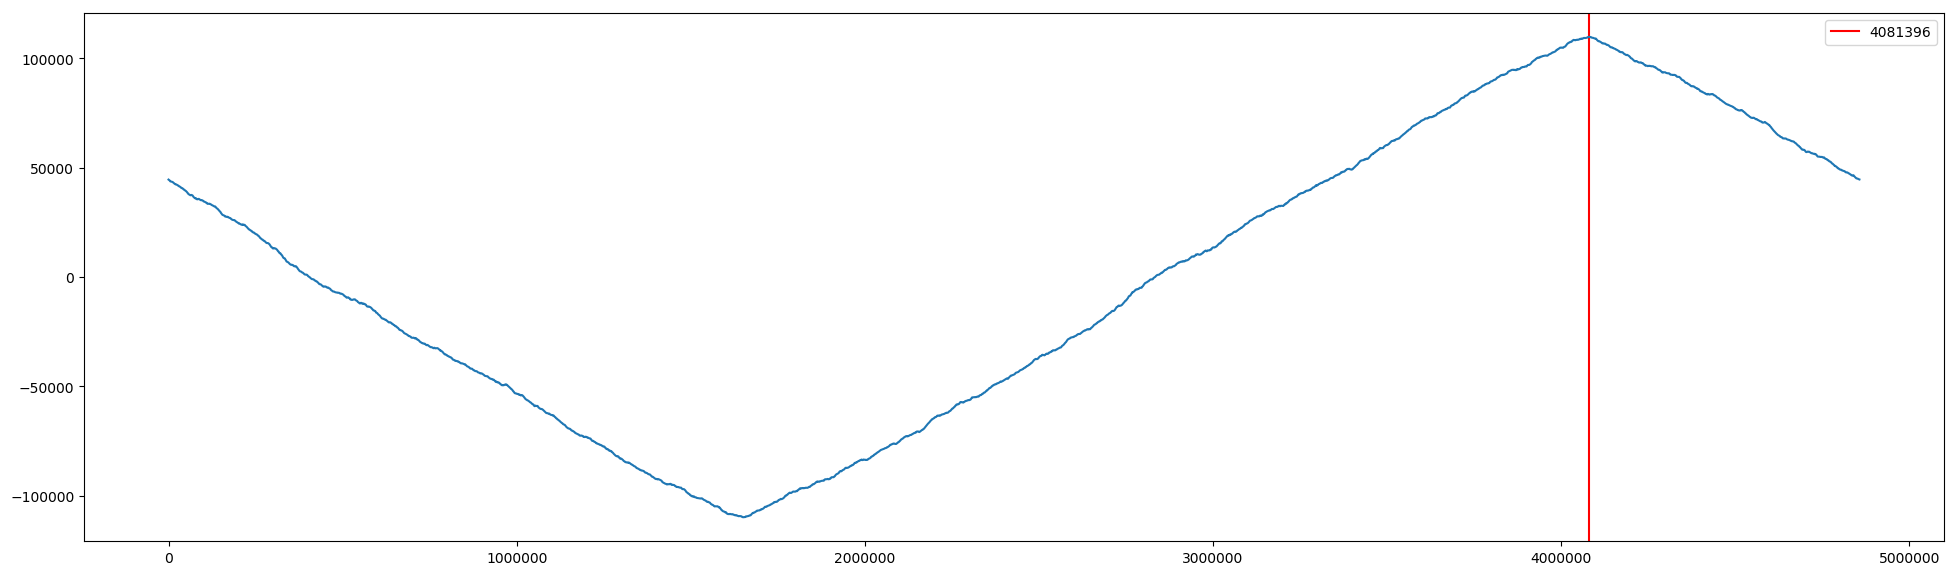

In [9]:
import numpy
def GCSkew(sequence):
    half = len(sequence)//2
    full = len(sequence)
    genome = numpy.fromstring(sequence+sequence, dtype='uint8')
    matchC = numpy.concatenate(([0], numpy.array(genome == ord('C'), dtype="int8").cumsum()))
    matchG = numpy.concatenate(([0], numpy.array(genome == ord('G'), dtype="int8").cumsum()))
    matchGC = matchG - matchC
    skew = matchGC[half:half+full]-matchGC[0:full]+matchGC[full-half:2*full-half]-matchGC[full:2*full]
    return skew

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

test = seq
y = GCSkew(test)
oriCGuess = y.argmax() 
N = len(y)
plt.figure(num=None, figsize=(24, 7), dpi=100)
plt.axvline(oriCGuess, color="r", linestyle='-', label=str(oriCGuess))
plt.legend(loc='upper right')
result = plt.plot(range(0,N,1000), y[0:N:1000])

**Problem #4:** A restriction enzyme is a protein produced by bacteria that cleaves DNA at specific subsequence patterns called *recognition sites*. Bacteria use restriction enzymes to defend against bacterial viruses called bacteriophages. The recognition site of a restriction enzyme is commonly a *reverse palindrome*, meaning the base sequence reads the same backwards and forwards, with a length of 4, 6, or 8 bases. The intervals between recognition sites are called *digestion fragments*.

How many possible reverse palindromic recognition sites of length 8 exist? What fraction of 8-mers are reverse palindromic? Approximately how frequently, in terms of base-pairs, would you expect a given 8-base recogonition site might appear in a genome? How frequently does the recognition site GAATTC appear in the complete genome of [Salmonella Typhimurium](http://csbio.unc.edu/mcmillan/Comp555S18/data/SalmonellaTyphimurium.fa)? How many digestion fragments result?

In [10]:
allKmers = list(product(["A","G","C","T"],repeat = 8))
count = 0
for a in allKmers:
    if a[0]==a[7] and a[1]==a[6] and a[2]==a[5] and a[3]==a[4]:
        count += 1
print count
print len(allKmers)
print float(count)/float(len(allKmers))

dic = kmerFreq(6, seq)
print dic["GAATTC"]

256
65536
0.00390625
751


**Problem #5: Programming Problem**

Write a branch-and-bound version of the *MedianStringMotifSearch()* algorithm shown below. You should base your alogrithm on the observation that, if the best alignment of a *prefix* of a candidate motif has a greater Hamming distance than the minimal Hamming distance of the best motif found so far, it could not possibly lead to a better solution.

<pre>
import itertools

def ScanAndScoreMotif(DNA, motif):
    totalDist = 0
    bestAlignment = []
    k = len(motif)
    for seq in DNA:
        minHammingDist = k+1
        for s in xrange(len(seq)-k+1):
            HammingDist = sum([1 for i in xrange(k) if motif[i] != seq[s+i]])
            if (HammingDist < minHammingDist):
                bestS = s
                minHammingDist = HammingDist
        bestAlignment.append(bestS)
        totalDist += minHammingDist
    return bestAlignment, totalDist

def MedianStringMotifSearch(DNA,k):
    """ Consider all possible 4**k motifs"""
    bestAlignment = []
    minHammingDist = k*len(DNA)
    kmer = ''
    for pattern in itertools.product('acgt', repeat=k):
        motif = ''.join(pattern)
        align, dist = ScanAndScoreMotif(DNA, motif)
        if (dist < minHammingDist):
            bestAlignment = [s for s in align]
            minHammingDist = dist
            kmer = motif
    return bestAlignment, minHammingDist, kmer
</pre>

Apply your algoritm to the set of sequences used in lecture:

<pre>
seqApprox = [
    'tagtggtcttttgagtgtagatctgaagggaaagtatttccaccagttcggggtcacccagcagggcagggtgacttaat',
    'cgcgactcggcgctcacagttatcgcacgtttagaccaaaacggagttggatccgaaactggagtttaatcggagtcctt',
    'gttacttgtgagcctggttagacccgaaatataattgttggctgcatagcggagctgacatacgagtaggggaaatgcgt',
    'aacatcaggctttgattaaacaatttaagcacgtaaatccgaattgacctgatgacaatacggaacatgccggctccggg',
    'accaccggataggctgcttattaggtccaaaaggtagtatcgtaataatggctcagccatgtcaatgtgcggcattccac',
    'tagattcgaatcgatcgtgtttctccctctgtgggttaacgaggggtccgaccttgctcgcatgtgccgaacttgtaccc',
    'gaaatggttcggtgcgatatcaggccgttctcttaacttggcggtgcagatccgaacgtctctggaggggtcgtgcgcta',
    'atgtatactagacattctaacgctcgcttattggcggagaccatttgctccactacaagaggctactgtgtagatccgta',
    'ttcttacacccttctttagatccaaacctgttggcgccatcttcttttcgagtccttgtacctccatttgctctgatgac',
    'ctacctatgtaaaacaacatctactaacgtagtccggtctttcctgatctgccctaacctacaggtcgatccgaaattcg']
</pre>

Use the %time *magic* function to compare the performance of your method to the one given.

In [11]:
import itertools
def ScanAndScoreMotif(DNA, motif):
    global maxLength
    totalDist = 0
    bestAlignment = []
    k = len(motif)
    for seq in DNA:
        minHammingDist = k+1
        for s in xrange(len(seq)-maxLength+1):
            HammingDist = sum([1 for i in xrange(k) if motif[i] != seq[s+i]])
            if (HammingDist < minHammingDist):
                bestS = s
                minHammingDist = HammingDist
        bestAlignment.append(bestS)
        totalDist += minHammingDist
    return bestAlignment, totalDist

def BranchAndBoundMotifRecursion(DNA,prefix,minHamming):
    global align1, prefix1, maxLength
    
    k = len(prefix)
    if (len(prefix) > 1):
        align, tempHamming = ScanAndScoreMotif(DNA, prefix)  
    else: 
        tempHamming = 0
        
    if k != maxLength:
        if (tempHamming > minHamming):
            return minHamming, align1, prefix
        
        else:
            for char in ['a','c','t','g']:
                newPrefix = prefix + char
                minHamming, tempAlign, tempPrefix = BranchAndBoundMotifRecursion(DNA, newPrefix, minHamming)
            return minHamming, align1, prefix
        
    else:
        align1, score = ScanAndScoreMotif(DNA, prefix)
        if (tempHamming > minHamming):
            return minHamming, align1, prefix
        
        else:
            prefix1 = prefix
            return tempHamming, align1, prefix
        
        
def BranchAndBoundMedianStringMotifSearch(DNA, k):
    global align1, prefix1, maxLength
    maxLength = k
    minHamming, align1, prefix = BranchAndBoundMotifRecursion(DNA, "", len(DNA)*k+1)
    return minHamming, align1, prefix1
seqApprox = [
    'tagtggtcttttgagtgtagatctgaagggaaagtatttccaccagttcggggtcacccagcagggcagggtgacttaat',
    'cgcgactcggcgctcacagttatcgcacgtttagaccaaaacggagttggatccgaaactggagtttaatcggagtcctt',
    'gttacttgtgagcctggttagacccgaaatataattgttggctgcatagcggagctgacatacgagtaggggaaatgcgt',
    'aacatcaggctttgattaaacaatttaagcacgtaaatccgaattgacctgatgacaatacggaacatgccggctccggg',
    'accaccggataggctgcttattaggtccaaaaggtagtatcgtaataatggctcagccatgtcaatgtgcggcattccac',
    'tagattcgaatcgatcgtgtttctccctctgtgggttaacgaggggtccgaccttgctcgcatgtgccgaacttgtaccc',
    'gaaatggttcggtgcgatatcaggccgttctcttaacttggcggtgcagatccgaacgtctctggaggggtcgtgcgcta',
    'atgtatactagacattctaacgctcgcttattggcggagaccatttgctccactacaagaggctactgtgtagatccgta',
    'ttcttacacccttctttagatccaaacctgttggcgccatcttcttttcgagtccttgtacctccatttgctctgatgac',
    'ctacctatgtaaaacaacatctactaacgtagtccggtctttcctgatctgccctaacctacaggtcgatccgaaattcg']
%time BranchAndBoundMedianStringMotifSearch(seqApprox,10)

CPU times: user 42.4 s, sys: 167 ms, total: 42.5 s
Wall time: 42.5 s


(11, [17, 47, 18, 33, 21, 0, 46, 70, 16, 65], 'tagatccgaa')

Click [here to submit](http://csbio.unc.edu/mcmillan/index.py?run=PS.upload) your completed problem set